# **PROJETO MÓDULO 3 - ANÁLISE DA BASE DE DADOS PeNSE**

Meu nome é Nicolas dos Santos Bueno e sou graduando em Administração na Universidade de Santa Cruz do Sul. Desde pequeno curto a área de computação e, ao conhecer a Ciência de Dados (uma área em que eu posso juntar meu gosto pela Programação, Matemática e Administração) acabei me identificando demais.

Meus links e contatos:
* Email: nicolasbuen98@gmail.com
* LinkedIn: [nicolas-bueno-a37517187/](https://www.linkedin.com/in/nicolas-bueno-a37517187/)
* GitHub: [/nicolasbuen](https://github.com/nicolasbuen)


### **Proposta da equipe Alura para o Projeto 3**

A base de dados PeNSE 2015 (Pequisa Nacional de Saúde do Escolar) foi organizada com base em questionários preenchidos por mais de 100 mil estudantes brasileiros de todo o país, com suas percepções sobre saúde, violência, ambiente familiar, nutrição, comportamento de risco e prática de atividade física, entre outros. Seu desafio será explorar esta base de dados, fazendo uma análise descritiva dos dados e obtendo insights para saúde pública no Brasil.

Como são muitos os áreas trabalhada na pesquisa é importante você restringir o seu nicho de atuação tentando responder perguntas sobre temas específicos.
Lembrando que o grande objetivo é utilizar os conhecimentos do módulo 01, 02 e 03 para investigar determinados problemas e criar insights para saúde pública no Brasil.

Você deve criar um Google Colab para submeter seu projeto, no próximo passo temos as instruções para submissão e definição das datas.

Bora mergulhar que esse projeto será desafiador!


## **Apresentação**

### Objetivo e Metodologia

Nesse trabalho, meu objetivo foi identificar uma relação (ou a falta de uma) entre a **experimentação e o uso contínuo do cigarro** e o **ambiente familiar** na amostra pesquisada. 

Para realizar isso, inicialmente procurei entender quem eram os alunos através das perguntas caracterizadoras que a pesquisa propôs (sexo, cor, idade, série/ano, etc.) e daquelas que envolvem o consumo de cigarro. Em seguida, utilizei as perguntas relacionadas **ao contexto familiar** (como aquelas envolvendo o conhecimento dos pais sobre os deveres do colégio e o tempo livre dos filhos, a participação no dia-a-dia entre outras) e comparei as respostas delas entre 4 grupos diferentes dentro da amostra pesquisada (note que alguns grupos englobam outros):

* **Todos os alunos**: esse grupo envolve todos os alunos que responderam a pergunta pesquisada.


* **Alunos que nunca experimentaram cigarro**: nesse grupo estão os alunos que responderam "Não" à pergunta **VB04001** - Alguma vez na vida, você já fumou cigarro, mesmo uma ou duas tragadas?


* **Alunos que já experimentaram cigarro**: esse grupo engloba os alunos que responderam "Sim" à pergunta **VB04001**.


* **Alunos que consomem cigarro atualmente**: entraram nesse grupo todos os alunos que afirmaram ter fumado pelo menos uma vez nos últimos 30 dias (**VB04003** - Nos últimos 30 dias, em quantos dias você fumou cigarro?).





### Pesquisa Bibliográfica

O fortalecimento de vínculos familiares é importante para a prevenção de comportamentos de riscos entre jovens e adolescentes. Os pais e responsáveis estarem atentos às atividades dos adolescentes, estabelecendo laços de confiança e diálogo e conhecendo suas demandas, colaboram para que os adolescentes cresçam com segurança.


O uso do álcool, do tabaco e de outras drogas são comportamentos de risco que
se iniciam, geralmente, em idades precoces e se estendem por toda vida (PALMER et al., 2009; HERON et al., 2012). Além disso, o tabagismo é a principal causa de morte evitável no mundo, impondo uma grande carga sobre a sociedade e, no caso do Brasil, que possui um Sistema Único de Saúde gratuito, a carga pesa também aos cofres públicos. 

Segundo o estudo HBSC, desenvolvido pela Organização Mundial da Saúde - OMS (World Health Organization - WHO) no período 2008-2009, o hábito de fumar é tipicamente estabelecido durante a adolescência. A maioria dos fumantes fumou o primeiro cigarro, ou já era viciada, antes dos 18 anos de idade (SOCIAL, 2012)

Identificar possíveis motivos que causam o consumo de cigarro precoce facilita a criação de políticas públicas anti-tabagistas e, nesse caso, educa pais/responsáveis sobre as suas ações.


### Hipóteses

* Alunos com pais/responsáveis fumantes tendem a experimentar/consumir cigarro devido à normalização do tabaco.

* Alunos com pais/responsáveis mais participativos tem menor tendencia à experimentar/consumir cigarro.

* Pais/responsáveis super-protetores e/ou que desrespeitam a individualidade do aluno causam efeito contrário em relação à experimentação/consumo de cigarro quando comparados a pais/responsáveis participativos.

---




## Análise Exploratória Inicial

### Importação das bibliotecas e dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from helper import criar_dicionario_respostas, criar_tab_freq, plot_hist_e_estatisticas_de_centralidade, tldr_point_plot

%matplotlib inline

Data sets disponíveis em [IBGE](https://www.ibge.gov.br/estatisticas/sociais/educacao/9134-pesquisa-nacional-de-saude-do-escolar.html?=&t=downloads). Foram utilizados para esse projeto a Amostra 2 do ano de 2015 e o dicionário com as perguntas.

In [2]:
df = pd.read_csv('PENSE_AMOSTRA2_ALUNO.CSV', sep = ";", engine = "python")
dicionario = pd.read_excel("Dicionario_PENSE_Microdados_AMOSTRA2.xls")
df.head(5)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,"299,735235",1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,"355,170081",1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,"299,735235",1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,"355,170081",1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,"299,735235",1,2,4,1,5,1,296


### Limpando o data set

In [3]:
df.head(5)

,ANOPESQ,PAIS,REGEOGR,VB00004,VB01001,VB01002,VB01003,VB01004,VB01005,VB01006,...,ESTRATO_EXP,ESTRATOGEOREG,PESO,V0006,V0007,V0008,V0041,aluno,escola,turma
0,2015,76,1,1,2,1,13,7,7,1,...,1223,1,"299,735235",1,2,4,1,1,1,296
1,2015,76,1,1,2,1,14,4,7,1,...,1223,1,"355,170081",1,2,4,1,2,1,296
2,2015,76,1,1,1,4,13,6,7,1,...,1223,1,"299,735235",1,2,4,1,3,1,296
3,2015,76,1,1,1,1,14,6,7,1,...,1223,1,"355,170081",1,2,4,1,4,1,296
4,2015,76,1,1,1,1,13,9,7,1,...,1223,1,"299,735235",1,2,4,1,5,1,296


In [4]:
print(f"O data set conta com {df.shape[0]} observações e {df.shape[1]} variáveis.")

O data set conta com 16556 observações e 181 variáveis.


In [5]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
df.isna().any()

ANOPESQ          False
PAIS             False
REGEOGR          False
VB00004          False
VB01001          False
VB01002          False
VB01003          False
VB01004          False
VB01005          False
VB01006          False
VB01007          False
VB01008A         False
VB01010A         False
VB01011          False
VB01012          False
VB01013          False
VB01014          False
VB01015A         False
VB01016          False
VB01017          False
VB01018          False
VB01019          False
VB01020A         False
VB01021          False
VB01022          False
VB01023          False
VB01024          False
VB01025          False
VB01026          False
VB02001          False
VB02002          False
VB02004A         False
VB02010          False
VB02011          False
VB02013          False
VB02017A         False
VB02018A         False
VB02019A         False
VB02020A         False
VB02021          False
VB02022          False
VB02023          False
VB02024          False
VB02025    

As únicas colunas que possuem valores NaN são aquelas relacionadas com o tempo de deslocamento, peso e altura dos alunos, o que era esperado de acordo com a **documentação da base de dados.**

In [6]:
pd.set_option("display.max_rows", 20, "display.max_columns", 20)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16556 entries, 0 to 16555
Columns: 181 entries, ANOPESQ to turma
dtypes: float64(7), int64(171), object(3)
memory usage: 22.9+ MB


São em usa maioria colunas numéricas (float64 e int64). O que chama atenção são as colunas que possuem dados no formato de object, uma vez que quando utilizado o df.head() não apareceu nenhuma coluna não-numérica.

Diferentemente do Brasil, o pandas utiliza "." como separador decimal. Para consertar isso, podemos utilizar srt.replace nas colunas.

Também sobre as colunas:
* VB17003: Altura do estudante, incluindo os imputados, com uma casa decimal;
* VB17004: Variável identificadora se houve imputação no peso e/ou altura do estudante;
* PESO: Peso do aluno de acordo com a amostra, utilizado para expansão.

In [7]:
df[['VB17003', 'VB17004', 'PESO']] = df[['VB17003', 'VB17004', 'PESO']].replace(',',".", regex = True)
df[['VB17003', 'VB17004', 'PESO']] = df[['VB17003', 'VB17004', 'PESO']].astype(float)
df[['VB17003', 'VB17004', 'PESO']] 

,VB17003,VB17004,PESO
0,37.1,157.0,299.735235
1,50.2,152.0,355.170081
2,48.2,161.4,299.735235
3,69.4,172.5,355.170081
4,78.9,167.5,299.735235
...,...,...,...
16551,56.7,167.9,447.815539
16552,61.9,185.8,592.507440
16553,60.9,159.4,401.131512
16554,47.3,157.8,442.718091


### Conhecendo a amostra

A amostra 2 da Pesquisa Nacional de Saúde do Escolar - PeNSE 2015 - fornece dados sobre escolares de turmas do ensino fundamental (do 6º ao 9º ano) e do ensino médio (da 1ª a 3ª série). 

Foram definidas como perguntas caracterizadoras dos alunos:
* Qual é o seu sexo?
* Qual a sua idade?
* Qual é a sua cor ou raça?
* Em que ano/série você está?
* Medidas de peso e altura

Além das perguntas envolvendo características gerais, também serão observados os resultados daquelas que envolvem o consumo de cigarro. Para perguntas pertinentes apenas aos alunos que já experimentaram cigarro, foram descartadas as respostas feitas por alunos que nunca haviam experimentado.

* Alguma vez na vida, você já fumou cigarro, mesmo uma ou duas tragadas?
* Que idade você tinha quando experimentou fumar cigarro pela primeira vez?
* NOS ÚLTIMOS 30 DIAS, em quantos dias você fumou cigarros?
* NOS ÚLTIMOS 30 DIAS, em geral, como você conseguiu seus próprios cigarros?

#### Informações caracterizadoras dos alunos

In [8]:
print(f"Número de alunos que responderam de forma válida à pesquisa: {len(df)}")

Número de alunos que responderam de forma válida à pesquisa: 16556


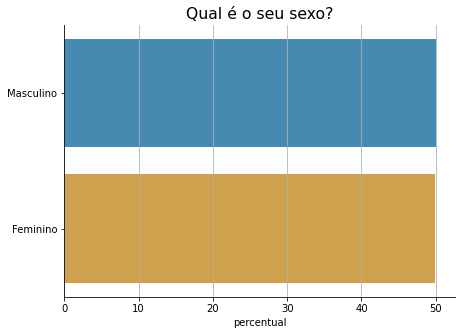

Qual é o seu sexo?,frequencia,percentual
Masculino,8287,50.054361
Feminino,8269,49.945639


In [9]:
criar_tab_freq("VB01001", df, dicionario, plot = True)

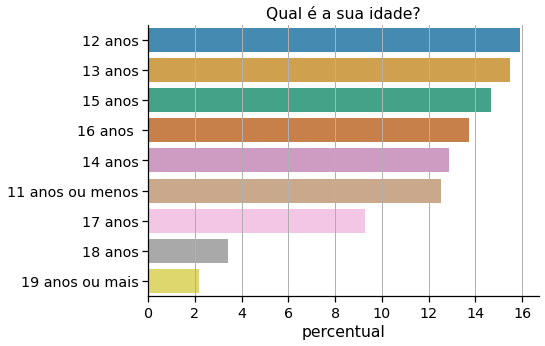

Qual é a sua idade?,frequencia,percentual
12 anos,2634,15.909640
13 anos,2561,15.468712
15 anos,2425,14.647258
16 anos,2270,13.711041
14 anos,2133,12.883547
11 anos ou menos,2072,12.515100
17 anos,1537,9.283643
18 anos,563,3.400580
19 anos ou mais,361,2.180478


In [10]:
criar_tab_freq("VB01003", df, dicionario, plot = True)

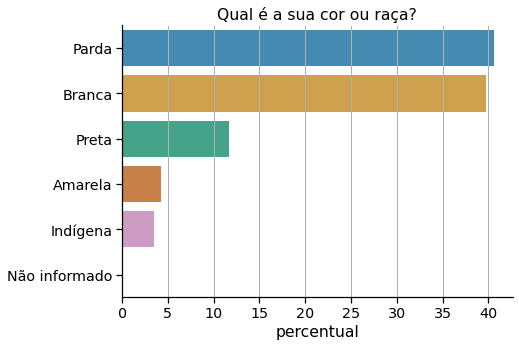

Qual é a sua cor ou raça?,frequencia,percentual
Parda,6726,40.625755
Branca,6575,39.713699
Preta,1939,11.711766
Amarela,712,4.300556
Indígena,581,3.509302
Não informado,23,0.138922


In [11]:
criar_tab_freq("VB01002", df, dicionario, plot = True)

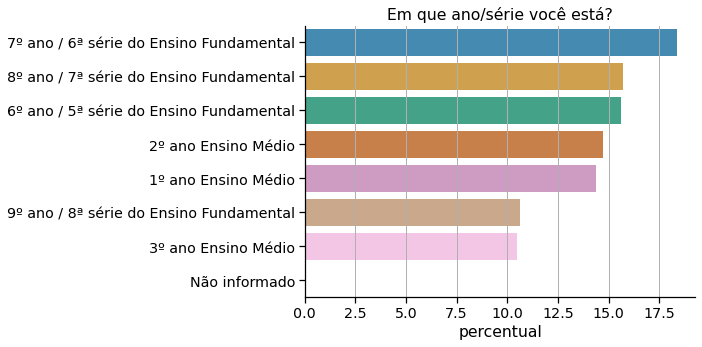

Em que ano/série você está?,frequencia,percentual
7º ano / 6ª série do Ensino Fundamental,3042,18.374003
8º ano / 7ª série do Ensino Fundamental,2604,15.728437
6º ano / 5ª série do Ensino Fundamental,2583,15.601595
2º ano Ensino Médio,2438,14.725779
1º ano Ensino Médio,2383,14.393573
9º ano / 8ª série do Ensino Fundamental,1761,10.636627
3º ano Ensino Médio,1736,10.485625
Não informado,9,0.054361


In [12]:
criar_tab_freq("VB01021", df, dicionario, plot = True)


Média:54.70558105822677 
Mediana:52.9
Moda:0    50.0
dtype: float64




<Figure size 2100x1400 with 0 Axes>

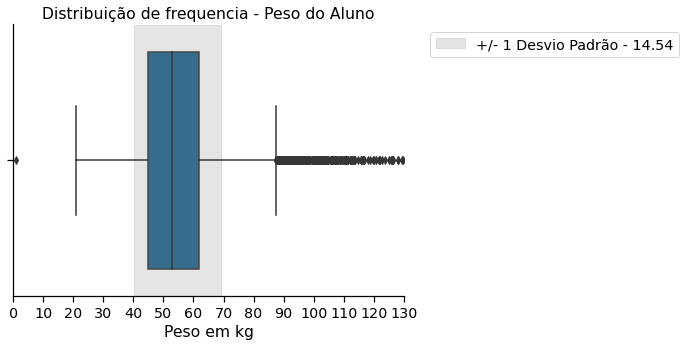

In [13]:
fig, ax = plot_hist_e_estatisticas_de_centralidade("VB17003", df, dicionario, bins = 25,)

ax.set(title = "Distribuição de frequencia - Peso do Aluno",
       xticks = np.arange(0,171.5,10),
       xlim = (0, 130),
       xlabel = "Peso em kg")
plt.show()


Média:160.71311307078818 
Mediana:160.4
Moda:0    160.0
dtype: float64




<Figure size 2100x1400 with 0 Axes>

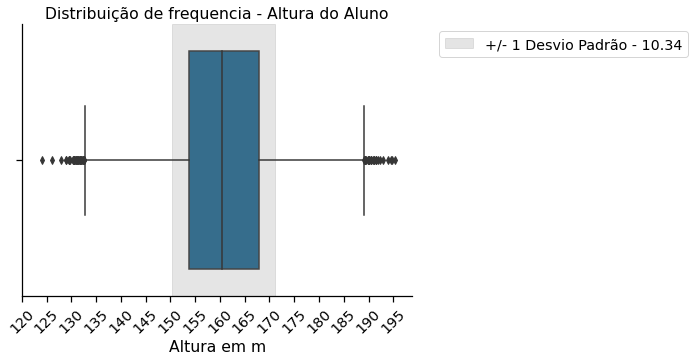

In [14]:
fig, ax = plot_hist_e_estatisticas_de_centralidade("VB17004", df, dicionario,  bins = 20)
ax.set(title = "Distribuição de frequencia - Altura do Aluno",
       xticks =(np.arange(120,195.3,5)),
       xlabel = "Altura em m")

plt.xticks(rotation=45)
plt.show()

#### Informações sobre o consumo de cigarro/tabaco entre os alunos pesquisados

Na amostra pesquisada, 16,9% dos alunos afirmaram que já experimentaram cigarro e 28,4% pularam o questionário. Do grupo de alunos que afirmou ter experimentado cigarro, 64% deles experimentou entre as idades de 12 e 15 anos. Além disso, 29,15% dos estudantes são fumantes atuais, ou seja, consumiram cigarro pelo menos uma vez nos últimos 30 dias.

Entre as formas mais comuns de obtenção do cigarro entre os alunos que fumaram recentemente, estão a compra direta (33,17%) e a obtenção através de um terceiro. 

Obs.: Notei algumas inconsistências entre as respostas de alguns alunos em relação à resposta sobre ter fumado cigarro nos últimos 30 dias. Diversos alunos que responderam ter fumado cigarro recentemente afirmaram não ter fumado nas perguntas que envolviam a obtenção deles. 

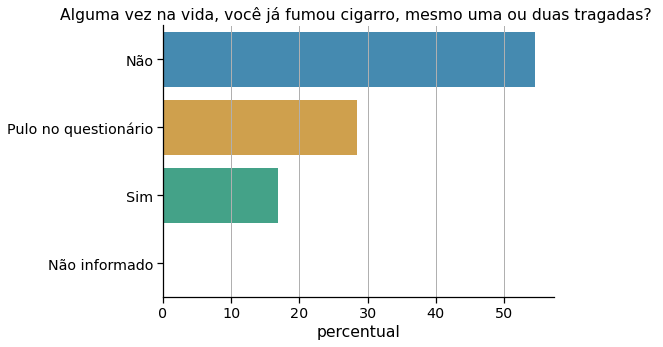

"Alguma vez na vida, você já fumou cigarro, mesmo uma ou duas tragadas?",frequencia,percentual
Não,9030,54.542160
Pulo no questionário,4706,28.424740
Sim,2803,16.930418
Não informado,17,0.102682


In [15]:
criar_tab_freq("VB04001", df, dicionario, plot = True)

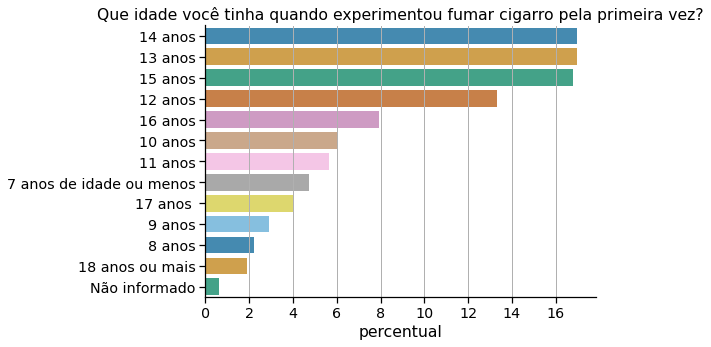

Que idade você tinha quando experimentou fumar cigarro pela primeira vez?,frequencia,percentual
14 anos,476,16.981805
13 anos,475,16.946129
15 anos,470,16.767749
12 anos,373,13.307171
16 anos,222,7.920086
10 anos,169,6.029254
11 anos,158,5.636818
7 anos de idade ou menos,133,4.744916
17 anos,114,4.067071
9 anos,81,2.889761


In [16]:
criar_tab_freq("VB04002", plot = True, df = df[df["VB04002"] != -1], dicionario = dicionario)

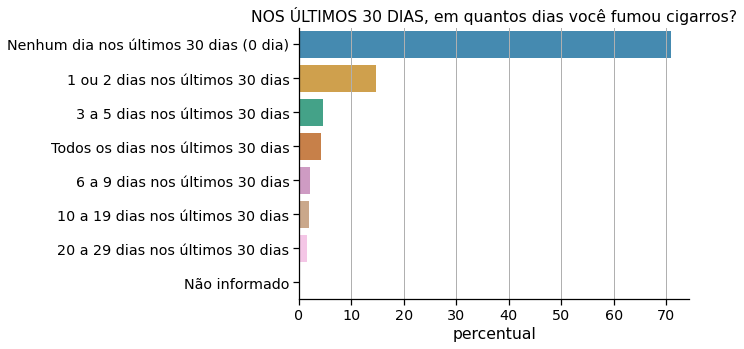

"NOS ÚLTIMOS 30 DIAS, em quantos dias você fumou cigarros?",frequencia,percentual
Nenhum dia nos últimos 30 dias (0 dia),1986,70.852658
1 ou 2 dias nos últimos 30 dias,411,14.662861
3 a 5 dias nos últimos 30 dias,127,4.530860
Todos os dias nos últimos 30 dias,117,4.174099
6 a 9 dias nos últimos 30 dias,62,2.211916
10 a 19 dias nos últimos 30 dias,52,1.855155
20 a 29 dias nos últimos 30 dias,42,1.498395
Não informado,6,0.214056


In [17]:
criar_tab_freq("VB04003", plot = True, df = df[df["VB04003"] != -1], dicionario = dicionario)

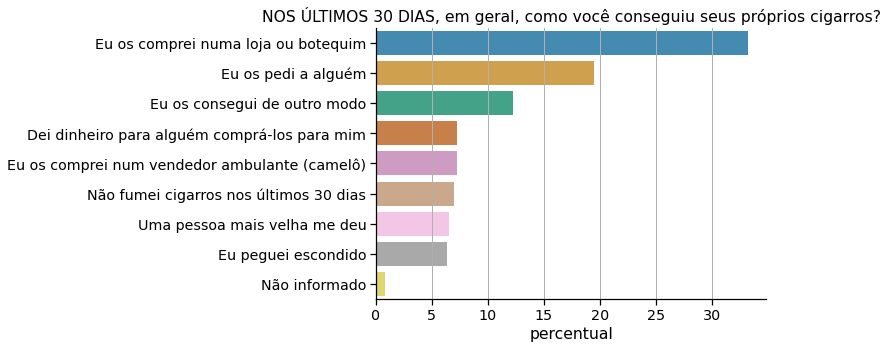

"NOS ÚLTIMOS 30 DIAS, em geral, como você conseguiu seus próprios cigarros?",frequencia,percentual
Eu os comprei numa loja ou botequim,271,33.170135
Eu os pedi a alguém,159,19.461444
Eu os consegui de outro modo,100,12.239902
Dei dinheiro para alguém comprá-los para mim,59,7.221542
Eu os comprei num vendedor ambulante (camelô),59,7.221542
Não fumei cigarros nos últimos 30 dias,57,6.976744
Uma pessoa mais velha me deu,53,6.487148
Eu peguei escondido,52,6.364749
Não informado,7,0.856793


In [18]:
criar_tab_freq("VB04009", plot = True, df = df[(df["VB04009"] != -1) & (df["VB04003"] > 1)], dicionario = dicionario)

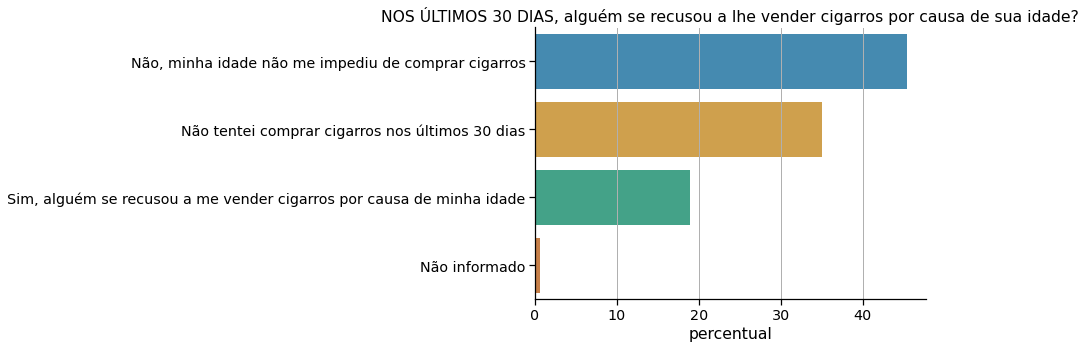

"NOS ÚLTIMOS 30 DIAS, alguém se recusou a lhe vender cigarros por causa de sua idade?",frequencia,percentual
"Não, minha idade não me impediu de comprar cigarros",371,45.410037
Não tentei comprar cigarros nos últimos 30 dias,286,35.006120
"Sim, alguém se recusou a me vender cigarros por causa de minha idade",155,18.971848
Não informado,5,0.611995


In [19]:
criar_tab_freq("VB04010", plot = True, df = df[(df["VB04009"] != -1) & (df["VB04003"] > 1)], dicionario = dicionario)

#### Informações caracterizadoras da escola e seu entorno

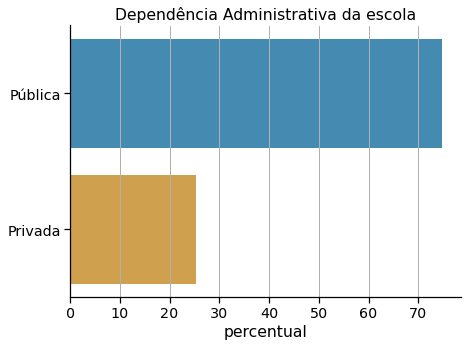

Dependência Administrativa da escola,frequencia,percentual
Pública,12381,74.782556
Privada,4175,25.217444


In [20]:
criar_tab_freq("V0007", df, dicionario, plot = True)

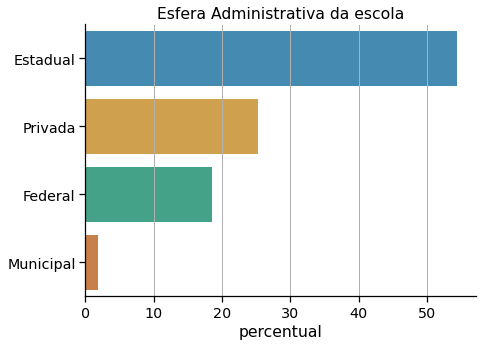

Esfera Administrativa da escola,frequencia,percentual
Estadual,9009,54.415318
Privada,4175,25.217444
Federal,3072,18.555207
Municipal,300,1.812032


In [21]:
criar_tab_freq("V0008", df, dicionario, plot = True)

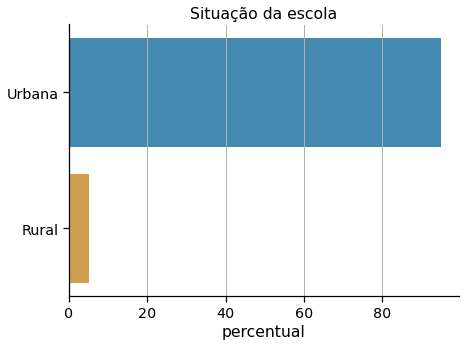

Situação da escola,frequencia,percentual
Urbana,15705,94.85987
Rural,851,5.14013


In [22]:
criar_tab_freq("V0006", df, dicionario, plot = True)

## Análise e Verificação das Hipóteses

Em primeiro momento, os alunos serão separados em quatro grupos, como descrito na Apresentação. 

Em seguida, utilizaremos as perguntas de caracterização para os alunos categorizados como atuais fumantes e aqueles que já experimentaram, na tentativa de verificar se variáveis como sexo e idade influenciam no consumo do cigarro.  

In [23]:
# Foi utilizada a pergunta VB04001 (sobre a experimentação do cigarro) para a separação dos grupos abaixo

alunos_que_ja_fumaram = df[df['VB04001'] == 1]
alunos_nao_fumaram = df[df['VB04001'] != 1]

# Para separar os fumantes recentes, foram selecionados os alunos que responderam ter fumado em pelo menos 1 dia dos últimos 30 (referente à data da pesquisa)

alunos_atuais_fumantes = df[(df['VB04003'] > 1) & (df['VB04003'] < 98)]


### Caracterizando os alunos que já fumaram e os atuais fumantes

#### Sexo

In [24]:
# Tabela de frequência do sexo dos alunos que já experimentaram cigarro

ja_fumaram = criar_tab_freq("VB01001", dicionario = dicionario, df = alunos_que_ja_fumaram)
ja_fumaram = ja_fumaram.rename({"percentual":"percentual alunos que já experimentaram"}, axis = 1)
ja_fumaram

Qual é o seu sexo?,frequencia,percentual alunos que já experimentaram
Masculino,1511,53.906529
Feminino,1292,46.093471


In [25]:
# Tabela de frequência do sexo dos alunos que fumaram recentemente

atuais = criar_tab_freq("VB01001", dicionario = dicionario, df = alunos_atuais_fumantes)
atuais = atuais.rename({"percentual":"percentual alunos fumantes"}, axis = 1)
atuais

Qual é o seu sexo?,frequencia,percentual alunos fumantes
Masculino,450,55.487053
Feminino,361,44.512947


In [26]:
# Criação da tabela de frequência utilizada no plot de barras abaixo

dfs = [ja_fumaram, atuais]
todos = criar_tab_freq("VB01001", df, dicionario)
todos_os_grupos = todos.drop("frequencia", axis = 1)

for item in dfs:
    item = item.drop("frequencia", axis = 1)
    todos_os_grupos = todos_os_grupos.join(item)

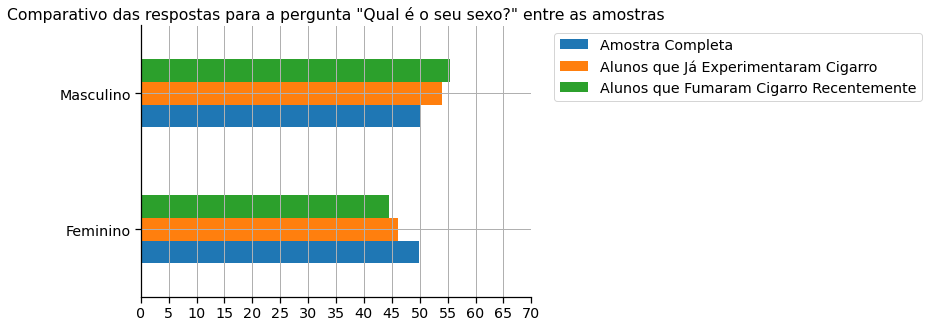

In [27]:
# Plot

fig, ax = plt.subplots(figsize = (7,5))

todos_os_grupos.sort_values(by="percentual", ascending = True).plot(kind = 'barh', ax = ax)

# Customização Axis
ax.set_xticks(np.arange(0,75,5))
plt.title('Comparativo das respostas para a pergunta "Qual é o seu sexo?" entre as amostras')

plt.legend(["Amostra Completa", "Alunos que Já Experimentaram Cigarro", "Alunos que Fumaram Cigarro Recentemente"], 
           bbox_to_anchor=(1.04,1), loc="upper left")


# Customização plot
plt.grid()
plt.style.use('seaborn-talk')
sns.set_context("notebook", font_scale = 1.5)
sns.set_palette('colorblind')
sns.despine()

ax;

Observando as tabelas de frequência e o gráfico, dá pra verificar que, apesar da pequena diferença, os alunos que se identificam pelo sexo masculino tendem a experimentar/tornar-se consumidores de cigarro mais do que as alunas.  

#### Idade

Devido a diferença no número de alunos entre as diferentes idades, foi calculado o número de alunos que experimentaram/são consumidores de cigarro a cada 100 alunos daquela faixa etária.

In [28]:
# Tabela de frequência para a idade dos alunos - alunos que experimentaram cigarro

tab_freq_idade_maiores_que_12 = criar_tab_freq("VB01003", dicionario = dicionario, df = df[df["VB01003"] > 12])

ja_fumaram = criar_tab_freq("VB01003", dicionario = dicionario, df = alunos_que_ja_fumaram)
ja_fumaram = ja_fumaram.rename(columns={"percentual":"percentual_ja_experimentaram"})
ja_fumaram["Alunos que experimentaram cigarro por 100 alunos"] = (ja_fumaram["frequencia"]/
                                                                  tab_freq_idade_maiores_que_12["frequencia"]) * 100

ja_fumaram.sort_values(by="Alunos que experimentaram cigarro por 100 alunos")

Qual é a sua idade?,frequencia,percentual_ja_experimentaram,Alunos que experimentaram cigarro por 100 alunos
13 anos,316,11.273635,12.338930
14 anos,443,15.804495,20.768870
15 anos,533,19.015341,21.979381
16 anos,625,22.297538,27.533040
17 anos,513,18.301819,33.376708
18 anos,216,7.706029,38.365897
19 anos ou mais,157,5.601142,43.490305


In [29]:
# Tabela de frequência para a idade dos alunos - alunos que são consumidores recentes de cigarro

atuais = criar_tab_freq("VB01003", dicionario = dicionario, df = alunos_atuais_fumantes)
atuais = atuais.rename(columns={"percentual":"percentual_atuais"})
atuais["Alunos que consumiram cigarro recentemente por 100 alunos"] = (atuais["frequencia"]/
                                                                       tab_freq_idade_maiores_que_12["frequencia"]) * 100

atuais = atuais.sort_values(by="Alunos que consumiram cigarro recentemente por 100 alunos")

In [30]:
dfs = [ja_fumaram, atuais]
todos = criar_tab_freq("VB01003", dicionario = dicionario, df = df)
todos_os_grupos = todos.drop("frequencia", axis = 1)

for item in dfs:
    item = item.drop("frequencia", axis = 1)
    todos_os_grupos = todos_os_grupos.join(item)

todos_os_grupos['sort_helper'] = [0.00000000001,0.00000000002,
                                  0.00000000004,0.00000000005,
                                  0.00000000003,0,0.00000000006,0.00000000007,0.00000000008]

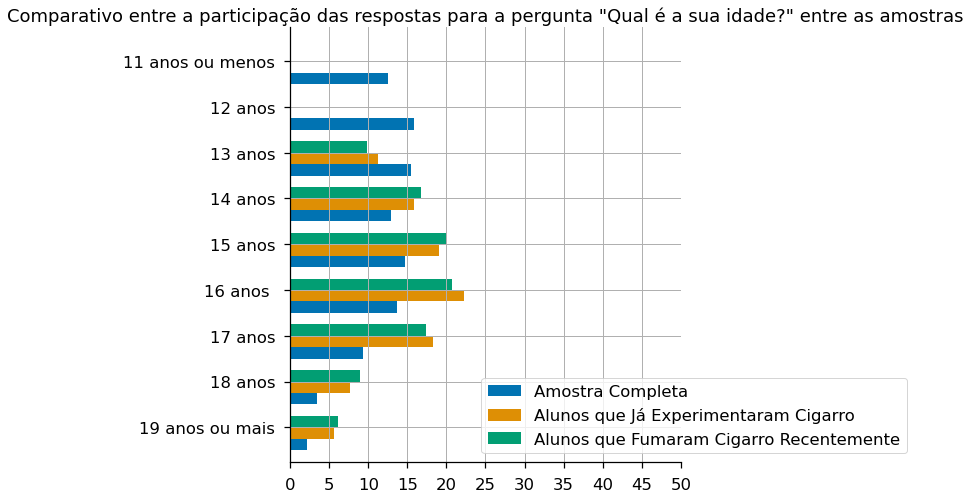

In [31]:
fig, ax = plt.subplots()

todos_os_grupos[['percentual', 'percentual_ja_experimentaram', 'percentual_atuais', 'sort_helper']]\
                    .sort_values(by='sort_helper', ascending = False)\
                    .plot(kind='barh', ax = ax, figsize = (7,8), width=1)

ax.set_xticks(np.arange(0,55,5))

plt.legend(["Amostra Completa", "Alunos que Já Experimentaram Cigarro", "Alunos que Fumaram Cigarro Recentemente"],
           loc="lower right",  bbox_to_anchor=(1.6, 0))
           
plt.title('Comparativo entre a participação das respostas para a pergunta "Qual é a sua idade?" entre as amostras')

# Customização plot
plt.grid()
sns.set_context("notebook", font_scale = 1.3)
sns.set_palette('colorblind')
sns.despine()
ax;

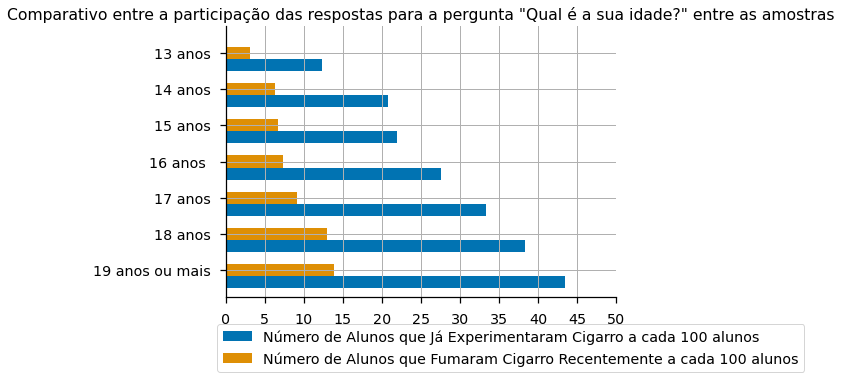

In [32]:
idade_experimento_consumo_ppc = todos_os_grupos[todos_os_grupos['sort_helper'] > 0.00000000001]\
                                [['Alunos que experimentaram cigarro por 100 alunos',
                                  'Alunos que consumiram cigarro recentemente por 100 alunos', 'sort_helper']]

fig, ax = plt.subplots(figsize = (7,5))
idade_experimento_consumo_ppc.sort_values(by='sort_helper', ascending = False)\
                                  .plot(kind='barh', ax = ax,  width = 1)

ax.set_xticks(np.arange(0,55,5))

plt.legend(["Número de Alunos que Já Experimentaram Cigarro a cada 100 alunos", "Número de Alunos que Fumaram Cigarro Recentemente a cada 100 alunos"],
            loc="lower right",  bbox_to_anchor=(1.5, -0.3))
           
plt.title('Comparativo entre a participação das respostas para a pergunta "Qual é a sua idade?" entre as amostras')

# Customização plot
plt.grid()
sns.set_context("notebook", font_scale = 1.3)
sns.set_palette('colorblind')
sns.despine()
ax;

Entre os alunos pesquisados na amostra, nenhum menor de 13 anos afirmou ter experimentado cigarro. Além disso, é possível perceber que a maior  parte dos alunos que afirmou ter experimentado/são fumantes recentes está entre os 14 e 16 anos. 

No entanto, ao compararmos o número de fumantes/por 100 alunos, observamos que a quantidade de alunos que experimentou/consome atualmente aumenta de acordo com a idade.

### Responsáveis fumantes

Para tentar identificar uma relação entre os pais/responsáveis serem fumantes e o escolar tender a experimentar o cigarro, utilizei tabelas de frequência para observar a diferença entre as amostras definidas na apresentação.

In [33]:
# TODOS OS ALUNOS QUE RESPONDERAM A PERGUNTA

todos = criar_tab_freq("VB04006A",
                       dicionario = dicionario, df = df[df["VB04006A"] != -1])

todos = todos.rename(columns={"percentual":"percentual_todos"})
todos

Algum de seus pais ou responsáveis fuma?,frequencia,percentual_todos
Nenhum deles,8688,73.316456
Só meu pai ou responsável do sexo masculino,1470,12.405063
Só minha mãe ou responsável do sexo feminino,925,7.805907
Meu pai e minha mãe ou responsáveis,469,3.957806
Não sei,268,2.261603
Não informado,30,0.253165


In [34]:
# APENAS OS ALUNOS QUE NUNCA FUMARAM E QUE RESPONDERAM A PERGUNTA

nunca_fumaram = criar_tab_freq("VB04006A", dicionario = dicionario,
                               df = alunos_nao_fumaram[alunos_nao_fumaram["VB04006A"] != -1])

nunca_fumaram = nunca_fumaram.rename(columns={"percentual":"percentual_nao_fumantes"})
nunca_fumaram

Algum de seus pais ou responsáveis fuma?,frequencia,percentual_nao_fumantes
Nenhum deles,6934,76.644191
Só meu pai ou responsável do sexo masculino,1021,11.285509
Só minha mãe ou responsável do sexo feminino,607,6.709406
Meu pai e minha mãe ou responsáveis,270,2.984415
Não sei,190,2.100144
Não informado,25,0.276335


In [35]:
# APENAS OS ALUNOS QUE JÁ FUMARAM E QUE RESPONDERAM A PERGUNTA

ja_fumaram = criar_tab_freq("VB04006A", dicionario = dicionario,
                            df= alunos_que_ja_fumaram[alunos_que_ja_fumaram["VB04006A"] != -1])
ja_fumaram = ja_fumaram.rename(columns={"percentual":"percentual_ja_experimentaram"})
ja_fumaram

Algum de seus pais ou responsáveis fuma?,frequencia,percentual_ja_experimentaram
Nenhum deles,1754,62.575812
Só meu pai ou responsável do sexo masculino,449,16.018552
Só minha mãe ou responsável do sexo feminino,318,11.344988
Meu pai e minha mãe ou responsáveis,199,7.099536
Não sei,78,2.782733
Não informado,5,0.178380


In [36]:
# APENAS OS ALUNOS QUE FUMAM ATUALMENTE E QUE RESPONDERAM A PERGUNTA

atuais = criar_tab_freq("VB04006A", dicionario = dicionario,
                        df= alunos_atuais_fumantes[alunos_atuais_fumantes["VB04006A"] != -1])

atuais = atuais.rename(columns={"percentual":"percentual_atuais"})
atuais

Algum de seus pais ou responsáveis fuma?,frequencia,percentual_atuais
Nenhum deles,438,54.007398
Só meu pai ou responsável do sexo masculino,156,19.235512
Só minha mãe ou responsável do sexo feminino,101,12.453761
Meu pai e minha mãe ou responsáveis,76,9.371147
Não sei,38,4.685573
Não informado,2,0.246609


In [37]:
dfs = [nunca_fumaram, ja_fumaram, atuais]
todos_os_grupos = todos.drop("frequencia", axis = 1)

for item in dfs:
    item = item.drop("frequencia", axis = 1)
    todos_os_grupos = todos_os_grupos.join(item)

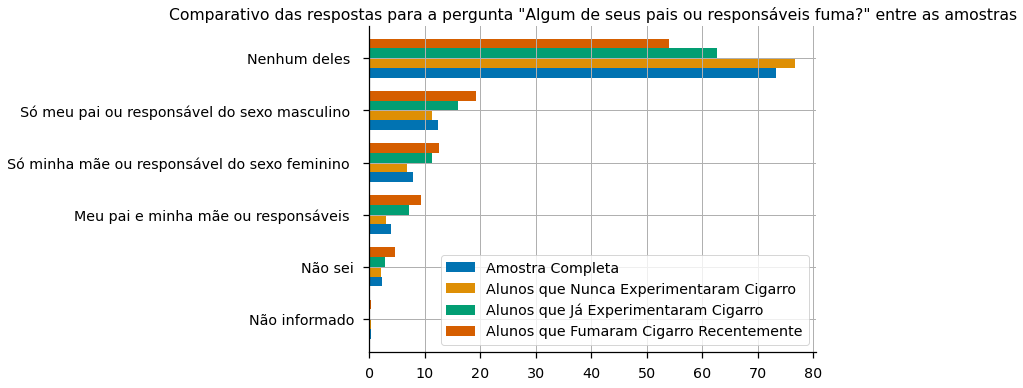

In [38]:
fig, ax = plt.subplots(figsize = (8,6))

todos_os_grupos.sort_values(by="percentual_todos", ascending = True).plot(kind='barh', width = 0.75, ax = ax)

ax.set_xticks(np.arange(0,85,10))

plt.legend(["Amostra Completa","Alunos que Nunca Experimentaram Cigarro",
            "Alunos que Já Experimentaram Cigarro", "Alunos que Fumaram Cigarro Recentemente"])
           
plt.title('Comparativo das respostas para a pergunta "Algum de seus pais ou responsáveis fuma?" entre as amostras')

# Customização plot
plt.grid()
sns.set_context("notebook", font_scale = 1.3)
sns.set_palette('colorblind')
sns.despine()
ax;

Através do gráfico de barras, fica claro que apesar da resposta "nenhum deles" ser a mais comum entre todas as amostras, a participação dela diminui na amostra em que o aluno afirma já ter experimentado cigarro e ainda mais naquela em que afirma ter consumido nos últimos 30 dias.

Comparativo das respostas para a pergunta "Algum de seus pais ou responsáveis fuma?" entre as amostras


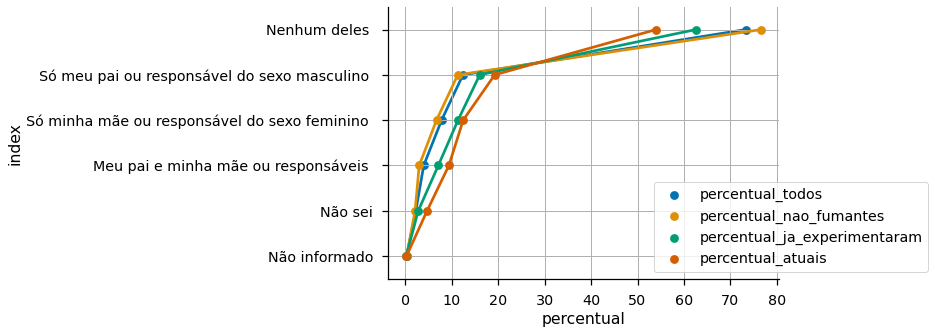

In [39]:
df_grouped_sorted = todos_os_grupos.sort_values(by="percentual_todos", ascending = False)

tldr_point_plot(df = df_grouped_sorted.reset_index(),
                title = 'Comparativo das respostas para a pergunta "Algum de seus pais ou responsáveis fuma?" entre as amostras',
                grupos = df_grouped_sorted.columns.tolist())

### Participação dos Responsáveis na Vida do Escolares

Para as próximas perguntas, utilizei a mesma fórmula de análise acima, envolvendo tabelas de frequência entre amostras separadas pela relação do aluno com o cigarro e gráfico de barras para observar de forma mais visual a diferença entre as amostras.

#### Falta sem Permissão dos Responsáveis

##### Tabelas de Frequência

In [40]:
# TODOS OS ALUNOS

todos = criar_tab_freq("VB07001", df, dicionario)
todos = todos.rename(columns={"percentual":"percentual_todos"})
todos

"NOS ÚLTIMOS 30 DIAS, em quantos dias você faltou às aulas ou à escola sem permissão dos seus pais ou responsáveis?",frequencia,percentual_todos
Nenhum dia nos últimos 30 dias (0 dia),12694,76.673109
1 ou 2 dias nos últimos 30 dias,2492,15.051945
3 a 5 dias nos últimos 30 dias,882,5.327374
6 a 9 dias nos últimos 30 dias,242,1.461706
10 ou mais dias nos últimos 30 dias,193,1.165741
Não informado,53,0.320126


In [41]:
# APENAS OS ALUNOS QUE NUNCA FUMARAM

nunca_fumaram = criar_tab_freq("VB07001", dicionario = dicionario, df = alunos_nao_fumaram)
nunca_fumaram = nunca_fumaram.rename(columns={"percentual":"percentual_nao_fumantes"})
nunca_fumaram

"NOS ÚLTIMOS 30 DIAS, em quantos dias você faltou às aulas ou à escola sem permissão dos seus pais ou responsáveis?",frequencia,percentual_nao_fumantes
Nenhum dia nos últimos 30 dias (0 dia),10917,79.379045
1 ou 2 dias nos últimos 30 dias,1916,13.931506
3 a 5 dias nos últimos 30 dias,601,4.369956
6 a 9 dias nos últimos 30 dias,150,1.090671
10 ou mais dias nos últimos 30 dias,122,0.887079
Não informado,47,0.341744


In [42]:
# APENAS OS ALUNOS QUE JÁ FUMARAM

ja_fumaram = criar_tab_freq("VB07001", dicionario = dicionario, df= alunos_que_ja_fumaram)
ja_fumaram = ja_fumaram.rename(columns={"percentual":"percentual_ja_experimentaram"})
ja_fumaram

"NOS ÚLTIMOS 30 DIAS, em quantos dias você faltou às aulas ou à escola sem permissão dos seus pais ou responsáveis?",frequencia,percentual_ja_experimentaram
Nenhum dia nos últimos 30 dias (0 dia),1777,63.396361
1 ou 2 dias nos últimos 30 dias,576,20.549411
3 a 5 dias nos últimos 30 dias,281,10.024973
6 a 9 dias nos últimos 30 dias,92,3.282198
10 ou mais dias nos últimos 30 dias,71,2.533000
Não informado,6,0.214056


In [43]:
# APENAS OS ALUNOS QUE FUMAM ATUALMENTE

atuais = criar_tab_freq("VB07001", dicionario = dicionario, df= alunos_atuais_fumantes)
atuais = atuais.rename(columns={"percentual":"percentual_atuais"})
atuais

"NOS ÚLTIMOS 30 DIAS, em quantos dias você faltou às aulas ou à escola sem permissão dos seus pais ou responsáveis?",frequencia,percentual_atuais
Nenhum dia nos últimos 30 dias (0 dia),444,54.747226
1 ou 2 dias nos últimos 30 dias,192,23.674476
3 a 5 dias nos últimos 30 dias,96,11.837238
6 a 9 dias nos últimos 30 dias,40,4.932182
10 ou mais dias nos últimos 30 dias,35,4.315660
Não informado,4,0.493218


In [44]:
dfs = [nunca_fumaram, ja_fumaram, atuais]
todos_os_grupos = todos.drop("frequencia", axis = 1)

for item in dfs:
    item = item.drop("frequencia", axis = 1)
    todos_os_grupos = todos_os_grupos.join(item)

##### TL-DR: Plot

Comparativo das respostas para a pergunta "NOS ÚLTIMOS 30 DIAS, em quantos dias você faltou às aulas ou à escola sem permissão dos seus pais ou responsáveis?" entre as amostras


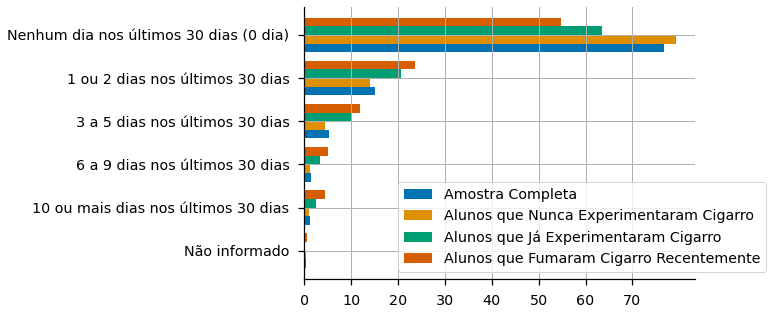

In [45]:
fig, ax = plt.subplots(figsize = (7,5))

todos_os_grupos.sort_values(by="percentual_todos", ascending = True).plot(kind='barh', ax = ax, width = 0.8)

ax.set_xticks(np.arange(0,80,10))

plt.legend(["Amostra Completa","Alunos que Nunca Experimentaram Cigarro", "Alunos que Já Experimentaram Cigarro", "Alunos que Fumaram Cigarro Recentemente"],
           loc="lower right", bbox_to_anchor=(1.2, -0.0))
           
print('Comparativo das respostas para a pergunta "NOS ÚLTIMOS 30 DIAS, em quantos dias você faltou às aulas ou à escola sem permissão dos seus pais ou responsáveis?" entre as amostras')

# Customização plot
plt.grid()
sns.set_context("notebook", font_scale = 1.3)
sns.set_palette('colorblind')
sns.despine()
ax;

Comparativo das respostas para a pergunta "NOS ÚLTIMOS 30 DIAS, em quantos dias você faltou às aulas ou à escola sem permissão dos seus pais ou responsáveis?" entre as amostras


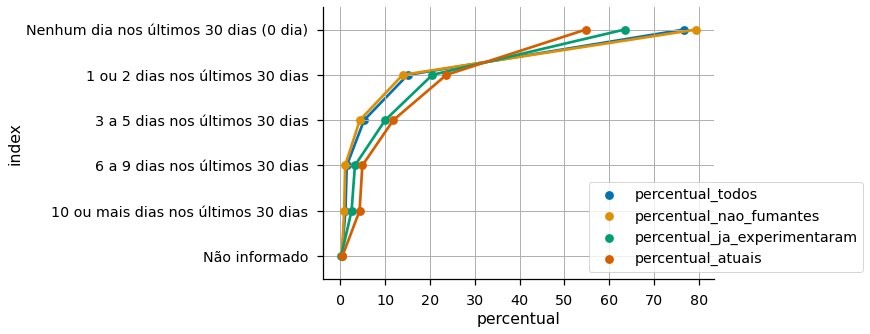

In [46]:
df_grouped_sorted = todos_os_grupos.sort_values(by="percentual_todos", ascending = False)

tldr_point_plot(df = df_grouped_sorted.reset_index(),
               title = 'Comparativo das respostas para a pergunta "NOS ÚLTIMOS 30 DIAS, em quantos dias você faltou às aulas ou à escola sem permissão dos seus pais ou responsáveis?" entre as amostras',
               grupos = df_grouped_sorted.columns.tolist())

Assim como na pergunta envolvendo os responsáveis fumantes, a opção em que os alunos negam a pergunta é a que possui mais participação (nesse caso, não ter faltado nenhum dia sem permissão). Também observamos comportamento parecido nas diferenças entre as amostras:
* alunos fumantes tendem a faltar mais do que o resto da amostra pesquisada;
* alunos que nunca experimentaram cigarro tem a maior participação na resposta "nenhum dia nos últimos 30 dias" entre as outras amostras.

#### Verificação dos Deveres de Casa

##### Tabelas de Frequência

In [47]:
# TODOS OS ALUNOS

todos = criar_tab_freq("VB07003", df, dicionario)
todos = todos.rename(columns={"percentual":"percentual_todos"})
todos

"NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis verificaram se os seus deveres de casa (lição de casa) foram feitos?",frequencia,percentual_todos
Nunca,4423,26.715390
Sempre,3637,21.967867
Às vezes,3562,21.514859
Raramente,2841,17.159942
Na maior parte do tempo,2000,12.080213
Não informado,93,0.561730


In [48]:
# APENAS OS ALUNOS QUE NUNCA FUMARAM

nunca_fumaram = criar_tab_freq("VB07003", dicionario = dicionario, df = alunos_nao_fumaram)
nunca_fumaram = nunca_fumaram.rename(columns={"percentual":"percentual_nao_fumantes"})
nunca_fumaram

"NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis verificaram se os seus deveres de casa (lição de casa) foram feitos?",frequencia,percentual_nao_fumantes
Sempre,3352,24.372864
Nunca,3200,23.267651
Às vezes,3070,22.322402
Raramente,2269,16.498219
Na maior parte do tempo,1781,12.949902
Não informado,81,0.588962


In [49]:
# APENAS OS ALUNOS QUE JÁ FUMARAM

ja_fumaram = criar_tab_freq("VB07003", dicionario = dicionario, df= alunos_que_ja_fumaram)
ja_fumaram = ja_fumaram.rename(columns={"percentual":"percentual_ja_experimentaram"})
ja_fumaram

"NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis verificaram se os seus deveres de casa (lição de casa) foram feitos?",frequencia,percentual_ja_experimentaram
Nunca,1223,43.631823
Raramente,572,20.406707
Às vezes,492,17.552622
Sempre,285,10.167677
Na maior parte do tempo,219,7.813057
Não informado,12,0.428113


In [50]:
# APENAS OS ALUNOS QUE FUMAM ATUALMENTE

atuais = criar_tab_freq("VB07003", dicionario = dicionario, df= alunos_atuais_fumantes)
atuais = atuais.rename(columns={"percentual":"percentual_atuais"})
atuais

"NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis verificaram se os seus deveres de casa (lição de casa) foram feitos?",frequencia,percentual_atuais
Nunca,362,44.636252
Raramente,146,18.002466
Às vezes,133,16.399507
Sempre,89,10.974106
Na maior parte do tempo,75,9.247842
Não informado,6,0.739827


In [51]:
dfs = [nunca_fumaram, ja_fumaram, atuais]
todos_os_grupos = todos.drop("frequencia", axis = 1)

for item in dfs:
    item = item.drop("frequencia", axis = 1)
    todos_os_grupos = todos_os_grupos.join(item)


##### TL-DR: Plot

Comparativo das respostas para a pergunta "NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis verificaram se os seus deveres de casa (lição de casa) foram feitos?" entre as amostras


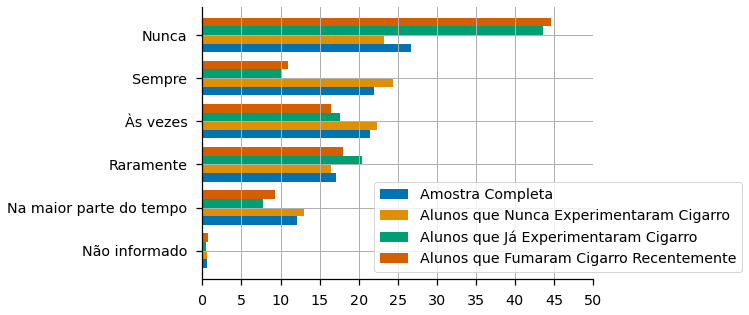

In [52]:
fig, ax = plt.subplots(figsize = (7,5))

todos_os_grupos.sort_values(by="percentual_todos", ascending = True).plot(kind='barh', ax = ax, width = 0.8) 

ax.set_xticks(np.arange(0,55,5))

plt.legend(["Amostra Completa","Alunos que Nunca Experimentaram Cigarro", "Alunos que Já Experimentaram Cigarro", "Alunos que Fumaram Cigarro Recentemente"],
           loc="lower right", bbox_to_anchor=(1.4, -0.0))
           
print('Comparativo das respostas para a pergunta "NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis verificaram se os seus deveres de casa (lição de casa) foram feitos?" entre as amostras')

# Customização plot
plt.grid()
sns.set_context("notebook", font_scale = 1.3)
sns.set_palette('colorblind')
sns.despine()
ax;

Comparativo das respostas para a pergunta "NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis verificaram se os seus deveres de casa (lição de casa) foram feitos?" entre as amostras


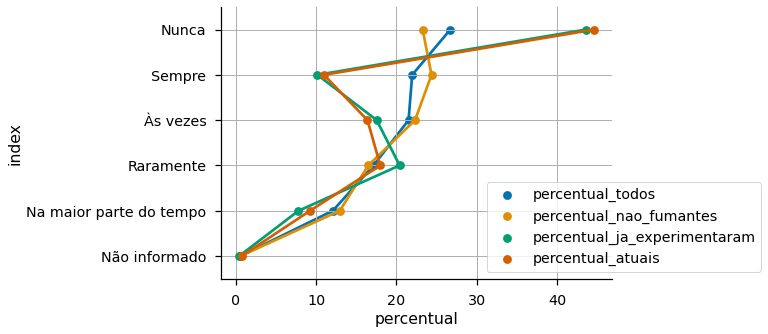

In [53]:
df_grouped_sorted = todos_os_grupos.sort_values(by="percentual_todos", ascending = False)

tldr_point_plot(df = df_grouped_sorted.reset_index(),
                title = 'Comparativo das respostas para a pergunta "NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis verificaram se os seus deveres de casa (lição de casa) foram feitos?" entre as amostras',
                grupos = df_grouped_sorted.columns.tolist())

Essa foi a primeira pergunta em que existiu diferença na resposta com maior participação entre as amostras. 
A resposta "sempre" foi a que teve maior presença nas respostas dos alunos que nunca fumaram cigarro quando perguntados sobre o hábito de verificar os deveres de casa.
Além disso, a diferença das respostas foi gritante para os alunos das amostras envolvendo o cigarro:
* aproximadamente o dobro da participação na resposta "Nunca";
* menos da metade da participação na resposta "Sempre".

#### Invasão de Privacidade

##### Tabelas de Frequência

In [54]:
# TODOS OS ALUNOS

todos = criar_tab_freq("VB07005", df, dicionario)
todos = todos.rename(columns={"percentual":"percentual_todos"})
todos

"NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis mexeram em suas coisas sem a sua concordância?",frequencia,percentual_todos
Nunca,7740,46.750423
Raramente,3633,21.943706
Às vezes,2985,18.029717
Sempre,1231,7.435371
Na maior parte do tempo,875,5.285093
Não informado,92,0.555690


In [55]:
# APENAS OS ALUNOS QUE NUNCA FUMARAM

nunca_fumaram = criar_tab_freq("VB07005", dicionario = dicionario, df = alunos_nao_fumaram)
nunca_fumaram = nunca_fumaram.rename(columns={"percentual":"percentual_nao_fumantes"})
nunca_fumaram

"NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis mexeram em suas coisas sem a sua concordância?",frequencia,percentual_nao_fumantes
Nunca,6520,47.407838
Raramente,2966,21.566204
Às vezes,2455,17.850651
Sempre,1030,7.489275
Na maior parte do tempo,701,5.097070
Não informado,81,0.588962


In [56]:
# APENAS OS ALUNOS QUE JÁ FUMARAM

ja_fumaram = criar_tab_freq("VB07005", dicionario = dicionario, df= alunos_que_ja_fumaram)
ja_fumaram = ja_fumaram.rename(columns={"percentual":"percentual_ja_experimentaram"})
ja_fumaram

"NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis mexeram em suas coisas sem a sua concordância?",frequencia,percentual_ja_experimentaram
Nunca,1220,43.524795
Raramente,667,23.795933
Às vezes,530,18.908313
Sempre,201,7.170888
Na maior parte do tempo,174,6.207635
Não informado,11,0.392437


In [57]:
# APENAS OS ALUNOS QUE FUMAM ATUALMENTE

atuais = criar_tab_freq("VB07005", dicionario = dicionario, df= alunos_atuais_fumantes)
atuais = atuais.rename(columns={"percentual":"percentual_atuais"})
atuais

"NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis mexeram em suas coisas sem a sua concordância?",frequencia,percentual_atuais
Nunca,318,39.210851
Raramente,186,22.934649
Às vezes,163,20.098644
Sempre,72,8.877928
Na maior parte do tempo,68,8.384710
Não informado,4,0.493218


In [58]:
dfs = [nunca_fumaram, ja_fumaram, atuais]
todos_os_grupos = todos.drop("frequencia", axis = 1)

for item in dfs:
    item = item.drop("frequencia", axis = 1)
    todos_os_grupos = todos_os_grupos.join(item)

##### TL-DR: Plot

Comparativo das respostas para a pergunta "NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis mexeram em suas coisas sem a sua concordância?" entre as amostras


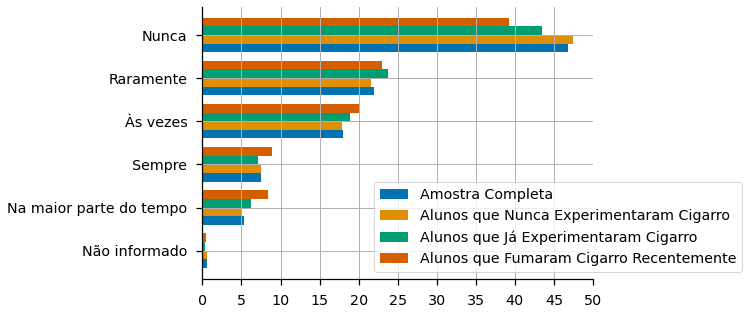

In [59]:
fig, ax = plt.subplots(figsize = (7,5))

todos_os_grupos.sort_values(by="percentual_todos", ascending = True).plot(kind='barh', ax = ax, width = 0.8)

ax.set_xticks(np.arange(0,55,5))

plt.legend(["Amostra Completa","Alunos que Nunca Experimentaram Cigarro", "Alunos que Já Experimentaram Cigarro", "Alunos que Fumaram Cigarro Recentemente"],
           loc="lower right", bbox_to_anchor=(1.4, -0.0))

# Customização plot
plt.grid()
sns.set_context("notebook", font_scale = 1.3)
sns.set_palette('colorblind')
sns.despine()
ax;
           
print('Comparativo das respostas para a pergunta "NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis mexeram em suas coisas sem a sua concordância?" entre as amostras')

Comparativo das respostas para a pergunta "NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis mexeram em suas coisas sem a sua concordância?" entre as amostras


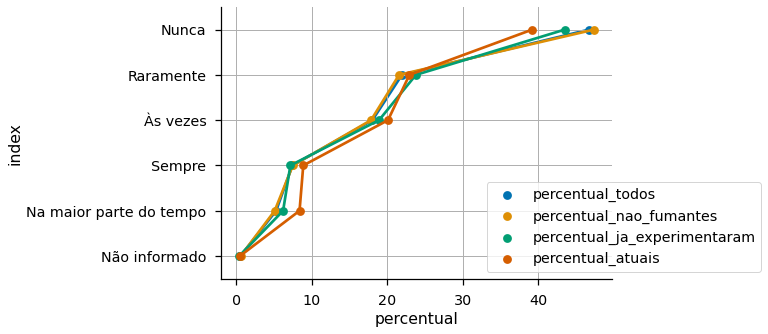

In [60]:
df_grouped_sorted = todos_os_grupos.sort_values(by="percentual_todos", ascending = False)

tldr_point_plot(df = df_grouped_sorted.reset_index(),
                title = 'Comparativo das respostas para a pergunta "NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis mexeram em suas coisas sem a sua concordância?" entre as amostras',
                grupos = df_grouped_sorted.columns.tolist())

Pequenas diferenças entre as amostras quando perguntados sobre a frequência em que seus pais/responsáveis mexiam nas coisas sem permissão. Ainda assim, é possível perceber que a resposta tende a ser mais positiva quando envolvendo alunos que já tiveram relação com o cigarro.

#### Janta em Família

##### Tabelas de Frequência

In [61]:
# TODOS OS ALUNOS

todos = criar_tab_freq("VB02017A",  df, dicionario)
todos = todos.rename(columns={"percentual":"percentual_todos"})
todos

"Você costuma almoçar ou jantar com sua mãe, pai ou responsável?",frequencia,percentual_todos
"Sim, todos os dias",11251,67.957236
Raramente,2219,13.402996
Não,998,6.028026
"Sim, 3 a 4 dias por semana",726,4.385117
"Sim, 5 a 6 dias por semana",677,4.089152
"Sim, 1 a 2 dias por semana",660,3.986470
Não informado,25,0.151003


In [62]:
# APENAS OS ALUNOS QUE NUNCA FUMARAM

nunca_fumaram = criar_tab_freq("VB02017A", dicionario = dicionario, df = alunos_nao_fumaram)
nunca_fumaram = nunca_fumaram.rename(columns={"percentual":"percentual_nao_fumantes"})
nunca_fumaram

"Você costuma almoçar ou jantar com sua mãe, pai ou responsável?",frequencia,percentual_nao_fumantes
"Sim, todos os dias",9784,71.140842
Raramente,1636,11.895586
Não,692,5.031629
"Sim, 3 a 4 dias por semana",549,3.991856
"Sim, 5 a 6 dias por semana",544,3.955501
"Sim, 1 a 2 dias por semana",524,3.810078
Não informado,24,0.174507


In [63]:
# APENAS OS ALUNOS QUE JÁ FUMARAM

ja_fumaram = criar_tab_freq("VB02017A", dicionario = dicionario, df= alunos_que_ja_fumaram)
ja_fumaram = ja_fumaram.rename(columns={"percentual":"percentual_ja_experimentaram"})
ja_fumaram

"Você costuma almoçar ou jantar com sua mãe, pai ou responsável?",frequencia,percentual_ja_experimentaram
"Sim, todos os dias",1467,52.336782
Raramente,583,20.799144
Não,306,10.916875
"Sim, 3 a 4 dias por semana",177,6.314663
"Sim, 1 a 2 dias por semana",136,4.851944
"Sim, 5 a 6 dias por semana",133,4.744916
Não informado,1,0.035676


In [64]:
# APENAS OS ALUNOS QUE FUMAM ATUALMENTE

atuais = criar_tab_freq("VB02017A", dicionario = dicionario, df= alunos_atuais_fumantes)
atuais = atuais.rename(columns={"percentual":"percentual_atuais"})
atuais

"Você costuma almoçar ou jantar com sua mãe, pai ou responsável?",frequencia,percentual_atuais
"Sim, todos os dias",395,48.705302
Raramente,201,24.784217
Não,102,12.577065
"Sim, 3 a 4 dias por semana",46,5.672010
"Sim, 1 a 2 dias por semana",35,4.315660
"Sim, 5 a 6 dias por semana",31,3.822441
Não informado,1,0.123305


In [65]:
dfs = [nunca_fumaram, ja_fumaram, atuais]
todos_os_grupos = todos.drop("frequencia", axis = 1)

for item in dfs:
    item = item.drop("frequencia", axis = 1)
    todos_os_grupos = todos_os_grupos.join(item)


##### TL-DR: Plot

Comparativo das respostas para a pergunta "Você costuma almoçar ou jantar com sua mãe, pai ou responsável?" entre as amostras


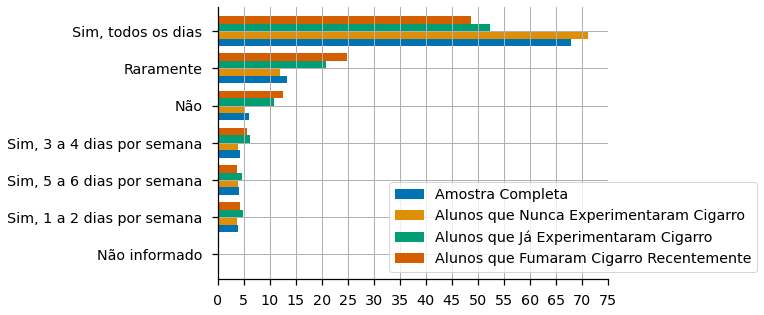

In [66]:
fig, ax = plt.subplots(figsize = (7,5))

todos_os_grupos.sort_values(by="percentual_todos", ascending = True).plot(kind='barh', ax = ax, width = 0.8)

ax.set_xticks(np.arange(0,80,5))

plt.legend(["Amostra Completa","Alunos que Nunca Experimentaram Cigarro", "Alunos que Já Experimentaram Cigarro", "Alunos que Fumaram Cigarro Recentemente"],
           loc="lower right", bbox_to_anchor=(1.4, -0.0))
           
print('Comparativo das respostas para a pergunta "Você costuma almoçar ou jantar com sua mãe, pai ou responsável?" entre as amostras')

# Customização plot
plt.grid()
sns.set_context("notebook", font_scale = 1.3)
sns.set_palette('colorblind')
sns.despine()
ax;

Comparativo das respostas para a pergunta "Você costuma almoçar ou jantar com sua mãe, pai ou responsável?" entre as amostras


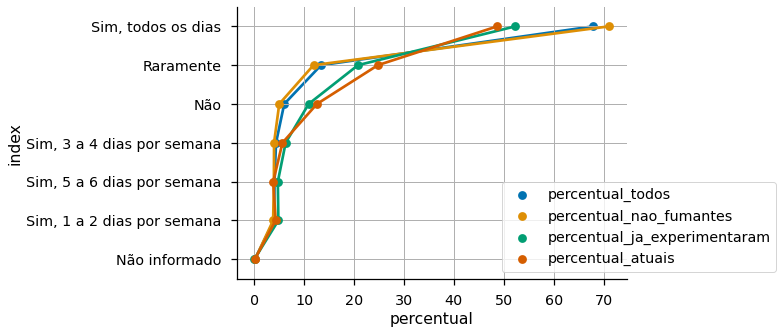

In [67]:
df_grouped_sorted = todos_os_grupos.sort_values(by="percentual_todos", ascending = False)

tldr_point_plot(df = df_grouped_sorted.reset_index(),
                title = 'Comparativo das respostas para a pergunta "Você costuma almoçar ou jantar com sua mãe, pai ou responsável?" entre as amostras',
                grupos = df_grouped_sorted.columns.tolist())

A maioria dos alunos de todas as amostras (com uma excessão da amostra dos alunos fumantes, mas por menos de 1,5%) afirma almoçar/jantar com os pais todos os dias. Mas assim como nas primeiras questões envolvendo os pais/responsáveis, alunos que nunca fumaram cigarro tem maior participação nas respostas mais positivas (em  favor da participação dos pais). 

#### Conhecimento dos Pais sobre as Atividades em Tempo Livre

##### Tabelas de Frequência

In [68]:
# TODOS OS ALUNOS

todos = criar_tab_freq("VB07002",  df, dicionario)
todos = todos.rename(columns={"percentual":"percentual_todos"})
todos

"NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis sabiam realmente o que você estava fazendo em seu tempo livre?",frequencia,percentual_todos
Sempre,6872,41.507611
Na maior parte do tempo,4277,25.833535
Às vezes,2306,13.928485
Nunca,1672,10.099058
Raramente,1348,8.142063
Não informado,81,0.489249


In [69]:
# APENAS OS ALUNOS QUE NUNCA FUMARAM

nunca_fumaram = criar_tab_freq("VB07002", dicionario = dicionario, df = alunos_nao_fumaram)
nunca_fumaram = nunca_fumaram.rename(columns={"percentual":"percentual_nao_fumantes"})
nunca_fumaram

"NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis sabiam realmente o que você estava fazendo em seu tempo livre?",frequencia,percentual_nao_fumantes
Sempre,6087,44.259434
Na maior parte do tempo,3541,25.747110
Às vezes,1812,13.175307
Nunca,1278,9.292518
Raramente,961,6.987566
Não informado,74,0.538064


In [70]:
# APENAS OS ALUNOS QUE JÁ FUMARAM

ja_fumaram = criar_tab_freq("VB07002", dicionario = dicionario, df= alunos_que_ja_fumaram)
ja_fumaram = ja_fumaram.rename(columns={"percentual":"percentual_ja_experimentaram"})
ja_fumaram

"NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis sabiam realmente o que você estava fazendo em seu tempo livre?",frequencia,percentual_ja_experimentaram
Sempre,785,28.005708
Na maior parte do tempo,736,26.257581
Às vezes,494,17.623974
Nunca,394,14.056368
Raramente,387,13.806636
Não informado,7,0.249732


In [71]:
# APENAS OS ALUNOS QUE FUMAM ATUALMENTE

atuais = criar_tab_freq("VB07002", dicionario = dicionario, df= alunos_atuais_fumantes)
atuais = atuais.rename(columns={"percentual":"percentual_atuais"})
atuais

"NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis sabiam realmente o que você estava fazendo em seu tempo livre?",frequencia,percentual_atuais
Na maior parte do tempo,185,22.811344
Sempre,173,21.331689
Às vezes,170,20.961776
Nunca,150,18.495684
Raramente,131,16.152898
Não informado,2,0.246609


In [72]:
dfs = [nunca_fumaram, ja_fumaram, atuais]
todos_os_grupos = todos.drop("frequencia", axis = 1)

for item in dfs:
  item = item.drop("frequencia", axis = 1)
  todos_os_grupos = todos_os_grupos.join(item)

todos_os_grupos = todos_os_grupos

In [73]:
todos_os_grupos

"NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis sabiam realmente o que você estava fazendo em seu tempo livre?",percentual_todos,percentual_nao_fumantes,percentual_ja_experimentaram,percentual_atuais
Sempre,41.507611,44.259434,28.005708,21.331689
Na maior parte do tempo,25.833535,25.747110,26.257581,22.811344
Às vezes,13.928485,13.175307,17.623974,20.961776
Nunca,10.099058,9.292518,14.056368,18.495684
Raramente,8.142063,6.987566,13.806636,16.152898
Não informado,0.489249,0.538064,0.249732,0.246609


##### TL-DR: Plot

NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis sabiam realmente o que você estava fazendo em seu tempo livre?


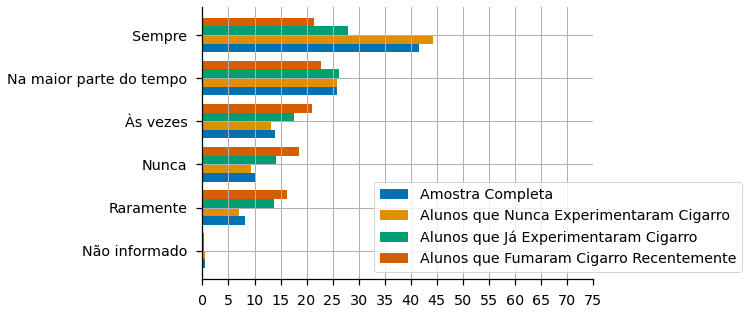

In [74]:
fig, ax = plt.subplots(figsize = (7,5))

todos_os_grupos.sort_values(by="percentual_todos", ascending = True).plot(kind='barh', ax = ax, width = 0.8)

ax.set_xticks(np.arange(0,80,5))

plt.legend(["Amostra Completa","Alunos que Nunca Experimentaram Cigarro", "Alunos que Já Experimentaram Cigarro", "Alunos que Fumaram Cigarro Recentemente"],
           loc="lower right", bbox_to_anchor=(1.4, -0.0))
           
print('NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis sabiam realmente o que você estava fazendo em seu tempo livre?')

# Customização plot
plt.grid()
sns.set_context("notebook", font_scale = 1.3)
sns.set_palette('colorblind')
sns.despine()
ax;

NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis sabiam realmente o que você estava fazendo em seu tempo livre?


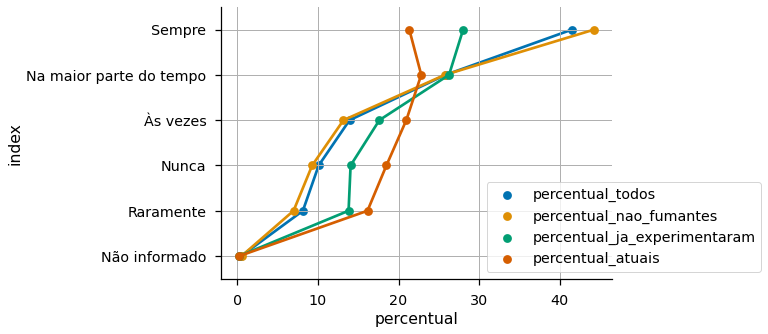

In [75]:
df_grouped_sorted = todos_os_grupos.sort_values(by="percentual_todos", ascending = False)

tldr_point_plot(df = df_grouped_sorted.reset_index(),
                title = 'NOS ÚLTIMOS 30 DIAS, com que frequência seus pais ou responsáveis sabiam realmente o que você estava fazendo em seu tempo livre?',
                grupos = df_grouped_sorted.columns.tolist())

## Conclusão

As edições anteriores da pesquisa (PeNSE 2009 e 2012) obtiveram resultados muito próximos ao relacionar o uso de drogas (lícitas e ilícitas) e iniciação sexual precoce com a participação dos pais na vida do escolar. Ao separar a amostra pesquisada de acordo com os níveis de interação do estudante com o cigarro, foi possível observar diferenças claras nas respostas relacionadas aos vínculos familiares entre os alunos e seus responsáveis, à participação dos responsáveis na vida escolar e, de forma bem evidente, na alimentação em família.


## Bibliografia

HERON, J. et al. Patterns of alcohol use in early adolescence predict problem use at age 16. Alcohol and Alcoholism, Oxford: Oxford University Press, v. 47, n. 2, p. 169-177, Mar. 2012.
<br>

PALMER, R. H. C. et al. Developmental epidemiology of drug use and abuse in adolescence and young adulthood: evidence of generalized risk. Drug and Alcohol Dependence, Limerick: Elsevier Scientific Publishers Ireland; Philadelphia: College on Problems of Drug Dependence - CPDD, v. 102, n. 1-3, p. 78–87, June 2009.
<br>

IBGE. Pesquisa nacional de saúde do escolar: 2015. Coordenação de População e Indicadores Sociais; Rio de Janeiro: IBGE, 2016.
<br>

SOCIAL determinants of health and well-being among young people: health behaviour in school-aged children (HBSC) study: international report from the 2009/2010 survey. Copenhagen: World Health Organization - WHO, Regional Office for Europe, 2012